# 🛠️ Preparación de los Datos

## 🔹 **Extracción del Archivo Tratado**

*Los datos contienen información demográfica, contractual, de servicios y cargos asociados a clientes de telecomunicaciones.*  

*En esta segunda parte del proyecto se utilizan los datos ya tratados en la Parte 1, almacenados en un archivo CSV.*  

*Este archivo contiene únicamente las columnas relevantes y los datos ya corregidos y estandarizados.*  

*Según el entorno de ejecución, el path puede variar:*


In [104]:
import pandas as pd

In [105]:
# Opción Google Colab
df = pd.read_csv('/content/datos_tratados.csv')

# Opción ejecución local (si clonás el repo)
# df = pd.read_csv('../data/datos_tratados.csv')

In [106]:
df.head()

,ID_Cliente,Evasion,Genero,Mayor_Edad,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Digital,Metodo_Pago,Pago_Mensual,Pago_Total,Pago_Diario
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque enviado,65.6,593.30,2.19
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mes a mes,No,Cheque enviado,59.9,542.40,2.00
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mes a mes,Sí,Cheque electrónico,73.9,280.85,2.46
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mes a mes,Sí,Cheque electrónico,98.0,1237.85,3.27
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mes a mes,Sí,Cheque enviado,83.9,267.40,2.80


## 🔹 **Eliminación de columnas irrelevantes**

*Se eliminan columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.*

In [107]:
# Mostrar todas las columnas del DataFrame
df.columns

Index(['ID_Cliente', 'Evasion', 'Genero', 'Mayor_Edad', 'Pareja',
       'Dependientes', 'Antiguedad', 'Servicio_Telefonico', 'Lineas_Multiples',
       'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online',
       'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
       'Streaming_Peliculas', 'Contrato', 'Factura_Digital', 'Metodo_Pago',
       'Pago_Mensual', 'Pago_Total', 'Pago_Diario'],
      dtype='object')

In [108]:
df = df.drop(columns=['ID_Cliente'])

In [109]:
# Revisar columnas restantes
df.columns

Index(['Evasion', 'Genero', 'Mayor_Edad', 'Pareja', 'Dependientes',
       'Antiguedad', 'Servicio_Telefonico', 'Lineas_Multiples',
       'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online',
       'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
       'Streaming_Peliculas', 'Contrato', 'Factura_Digital', 'Metodo_Pago',
       'Pago_Mensual', 'Pago_Total', 'Pago_Diario'],
      dtype='object')

## 🔹 **Encoding**

*Se convierten las variables categóricas a formato numérico mediante one-hot encoding para que los algoritmos de Machine Learning puedan procesarlas correctamente.*

In [110]:
# Listado de variables categóricas
categoricas = [
    'Genero', 'Mayor_Edad', 'Pareja', 'Dependientes',
    'Servicio_Telefonico', 'Lineas_Multiples', 'Servicio_Internet',
    'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas',
    'Contrato', 'Factura_Digital', 'Metodo_Pago'
]

In [111]:
# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

In [112]:
df_encoded.head()

,Evasion,Antiguedad,Pago_Mensual,Pago_Total,Pago_Diario,Genero_Masculino,Mayor_Edad_1,Pareja_Sí,Dependientes_Sí,Servicio_Telefonico_Sí,...,Streaming_TV_Sí,Streaming_TV_no internet service,Streaming_Peliculas_Sí,Streaming_Peliculas_no internet service,Contrato_Mes a mes,Contrato_Un año,Factura_Digital_Sí,Metodo_Pago_Cheque enviado,Metodo_Pago_Tarjeta de crédito (automática),Metodo_Pago_Transferencia bancaria (automática)
0,No,9,65.6,593.30,2.19,False,False,True,True,True,...,True,False,False,False,False,True,True,True,False,False
1,No,9,59.9,542.40,2.00,True,False,False,False,True,...,False,False,True,False,True,False,False,True,False,False
2,Sí,4,73.9,280.85,2.46,True,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
3,Sí,13,98.0,1237.85,3.27,True,True,True,False,True,...,True,False,True,False,True,False,True,False,False,False
4,Sí,3,83.9,267.40,2.80,False,True,True,False,True,...,True,False,False,False,True,False,True,True,False,False


## 🔹 **Verificación de la Proporción de Cancelación (Churn)**

*Se calcula la proporción de clientes que cancelaron respecto a los que permanecen activos. Esto permite detectar un posible desbalance de clases, que podría afectar el desempeño de los modelos predictivos.*

In [113]:
# Contar la cantidad de clientes por clase
proporcion = df_encoded['Evasion'].value_counts(normalize=True) * 100
proporcion

,proportion
Evasion,
No,73.463013
Sí,26.536987


## 🔹 **Balanceo de clases**

*Se aplica oversampling para equilibrar la cantidad de clientes que cancelaron con los que permanecen activos, evitando sesgo hacia la clase mayoritaria.*

*Este balanceo se muestra a nivel exploratorio. Para el entrenamiento de los modelos, el balanceo se aplica únicamente sobre el conjunto de entrenamiento para evitar data leakage.*

In [114]:
from sklearn.utils import resample

In [115]:
# Separar clases
df_no = df_encoded[df_encoded['Evasion'] == 'No']
df_si = df_encoded[df_encoded['Evasion'] == 'Sí']

In [116]:
# Oversampling de la clase minoritaria
df_si_upsampled = resample(df_si,
                           replace=True,       # muestreo con reemplazo
                           n_samples=len(df_no), # igualar a la clase mayoritaria
                           random_state=42)

In [117]:
# Combinar de nuevo
df_balanced = pd.concat([df_no, df_si_upsampled])

In [118]:
# Mezclar el dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [119]:
# Verificar proporción final
df_balanced['Evasion'].value_counts(normalize=True) * 100

,proportion
Evasion,
Sí,50.0
No,50.0


## 🔹 **Normalización o Estandarización**

*Modelos sensibles a la escala requieren estandarización de variables numéricas. Modelos basados en árboles no necesitan normalización.*

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
# Columnas numéricas a escalar
num_cols = ['Antiguedad', 'Pago_Mensual', 'Pago_Total', 'Pago_Diario']

In [122]:
# Creamos el scaler
scaler = StandardScaler()

In [123]:
# Ajustamos y transformamos
df_balanced[num_cols] = scaler.fit_transform(df_balanced[num_cols])

In [124]:
# Revisamos los primeros registros
df_balanced[num_cols].head()

,Antiguedad,Pago_Mensual,Pago_Total,Pago_Diario
0,0.305038,0.609810,0.403858,0.606313
1,1.010984,-0.284842,0.461599,-0.286529
2,-0.483961,-0.613632,-0.560319,-0.618750
3,-0.857697,0.256795,-0.678022,0.253329
4,-1.106854,-1.475405,-0.919558,-1.470065


# 🎯 **Correlación y Selección de Variables**

## 🔹 **Análisis de Correlación**

*Se visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Se presta especial atención a las variables que muestran mayor correlación con la cancelación, ya que pueden ser fuertes candidatas para el modelado predictivo.*

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
# Seleccionar solo columnas numéricas
num_cols = ['Antiguedad', 'Pago_Mensual', 'Pago_Total', 'Pago_Diario']

In [127]:
# Crear matriz de correlación
corr_matrix = df_balanced[num_cols + ['Evasion']].copy()

In [128]:
# Mapear Evasion a numérico
corr_matrix['Evasion'] = corr_matrix['Evasion'].map({'Sí':1, 'No':0})

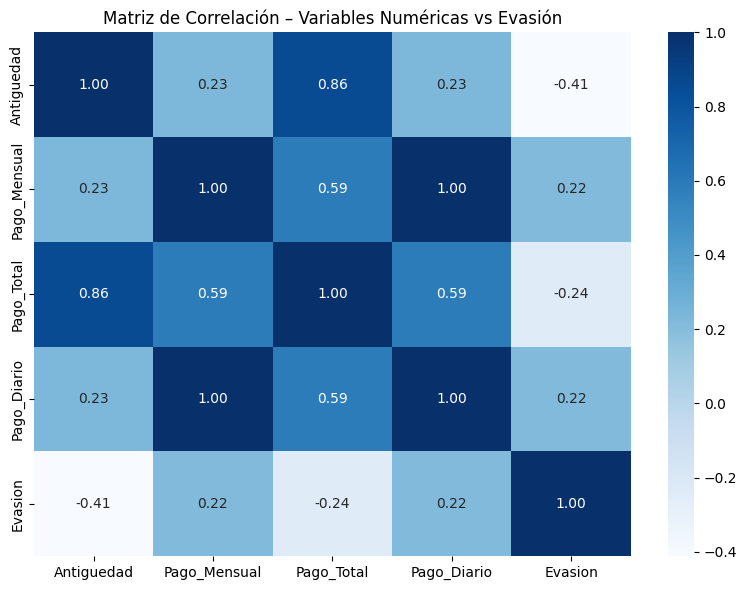

In [129]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de Correlación – Variables Numéricas vs Evasión")
plt.tight_layout()
plt.show()

## 🔹 **Análisis Dirigido**

*Se analizan visualmente variables clave para entender su relación con la cancelación (Churn).*

### ***Tiempo de contrato vs Cancelación***
*Boxplot para observar cómo la antigüedad influye en la cancelación.*

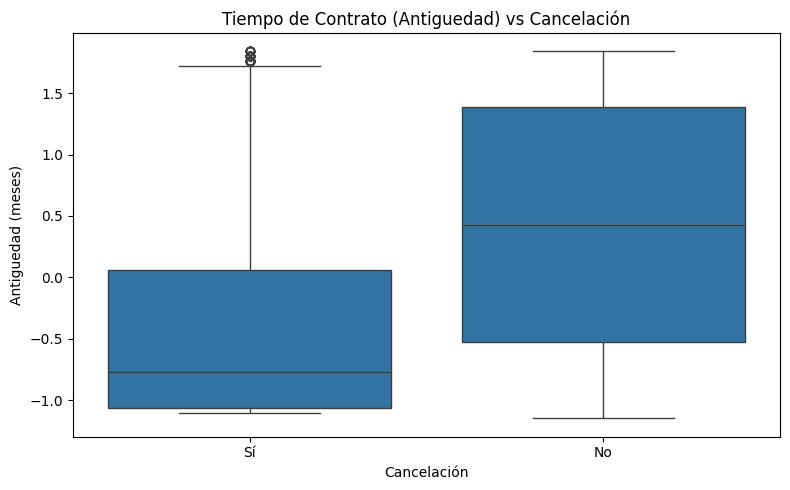

In [130]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Evasion', y='Antiguedad', data=df_balanced)
plt.title('Tiempo de Contrato (Antiguedad) vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Antiguedad (meses)')
plt.tight_layout()
plt.show()

### ***Gasto total vs Cancelación***
*Boxplot del pago total según el estado de cancelación.*

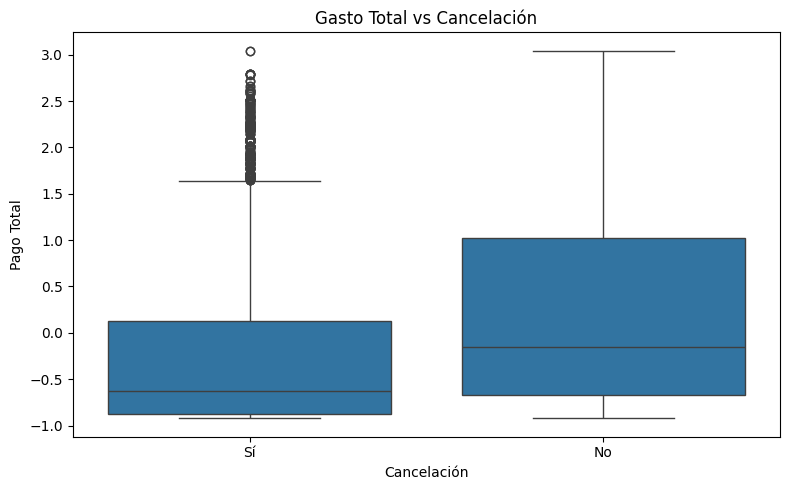

In [131]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Evasion', y='Pago_Total', data=df_balanced)
plt.title('Gasto Total vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Pago Total')
plt.tight_layout()
plt.show()

### ***Pago Mensual vs Pago Total y Cancelación***
*Scatterplot para identificar patrones entre pago mensual y total según cancelación.*

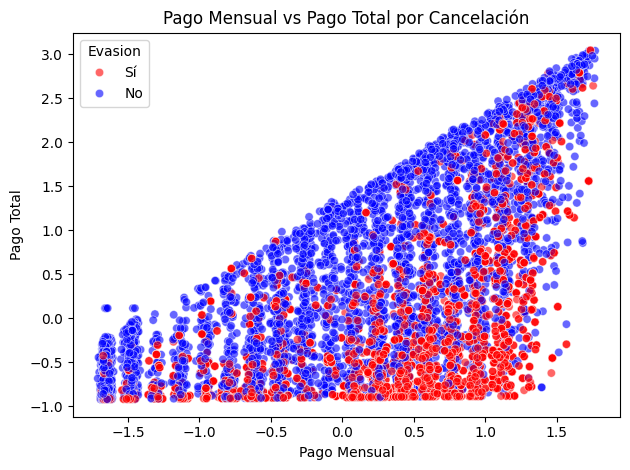

In [132]:
sns.scatterplot(
    x='Pago_Mensual',
    y='Pago_Total',
    hue='Evasion',
    data=df_balanced,
    alpha=0.6,
    palette={'Sí':'red','No':'blue'}
)
plt.title('Pago Mensual vs Pago Total por Cancelación')
plt.xlabel('Pago Mensual')
plt.ylabel('Pago Total')
plt.tight_layout()
plt.show()

# 🤖 **Modelado Predictivo**

## 🔹 **Separación de Datos en Entrenamiento y Prueba**

*Se divide el dataset en conjuntos de entrenamiento y prueba (70/30) para evaluar los modelos.*

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
# Variables predictoras (todas menos Evasion)
X = df_balanced.drop(columns=['Evasion'])

In [135]:
# Variable objetivo
y = df_balanced['Evasion'].map({'Sí':1, 'No':0})

In [136]:
# División en entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [137]:
# Verificar tamaños
print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)

Tamaño entrenamiento: (7243, 31)
Tamaño prueba: (3105, 31)


In [138]:
from sklearn.utils import resample

train_df = pd.concat([X_train, y_train], axis=1)

df_no = train_df[train_df['Evasion'] == 0]
df_si = train_df[train_df['Evasion'] == 1]

df_si_upsampled = resample(
    df_si,
    replace=True,
    n_samples=len(df_no),
    random_state=42
)

train_balanced = pd.concat([df_no, df_si_upsampled])
train_balanced = train_balanced.sample(frac=1, random_state=42)

X_train_bal = train_balanced.drop(columns=['Evasion'])
y_train_bal = train_balanced['Evasion']

y_train_bal.value_counts(normalize=True) * 100

,proportion
Evasion,
0,50.0
1,50.0


In [139]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Antiguedad', 'Pago_Mensual', 'Pago_Total', 'Pago_Diario']

scaler = StandardScaler()

X_train_bal[num_cols] = scaler.fit_transform(X_train_bal[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## 🔹 **Creación de Modelos**

In [140]:
# 📌 Modelo 1: Regresión Logística (sensible a la escala de las variables.)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [141]:
# Crear y entrenar el modelo
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_bal, y_train_bal)

LogisticRegression(max_iter=1000, random_state=42)

In [142]:
# Predecir
y_pred_log = log_model.predict(X_test)

In [143]:
# 📌 Modelo 2: Random Forest (no sensible a la escala de las variables.)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

## 🔹 **Justificación de modelos**

* **Regresión Logística:** sensible a la escala de las variables; se aplicó normalización para que los coeficientes reflejen correctamente la influencia de cada feature.  
* **Random Forest:** no sensible a la escala de las variables; puede manejar directamente las magnitudes originales sin afectar el desempeño.  

Esta combinación permite comparar un modelo que depende de la normalización con otro que no, facilitando la elección de la mejor estrategia de predicción de cancelación.

## 🔹 **Evaluación de los Modelos**

In [144]:
def evaluar_modelo(y_true, y_pred, nombre):
    print(f"📌 {nombre}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Matriz de Confusión:\n", confusion_matrix(y_true, y_pred))
    print("-"*50)

evaluar_modelo(y_test, y_pred_log, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

📌 Regresión Logística
Accuracy: 0.7809983896940419
Precision: 0.7595238095238095
Recall: 0.8221649484536082
F1-score: 0.7896039603960396
Matriz de Confusión:
 [[1149  404]
 [ 276 1276]]
--------------------------------------------------
📌 Random Forest
Accuracy: 0.8863123993558776
Precision: 0.8516129032258064
Recall: 0.9355670103092784
F1-score: 0.8916180534233957
Matriz de Confusión:
 [[1300  253]
 [ 100 1452]]
--------------------------------------------------


## 🔹 **Análisis Comparativo de Resultados**

* Se comparan los modelos según las métricas obtenidas:
  * **Exactitud (Accuracy)**
  * **Precisión (Precision)**
  * **Recall**
  * **F1-score**
  * **Matriz de Confusión**

* **Discusión sobre desempeño:**
  * Identificar qué modelo presenta mejor desempeño general.
  * Detectar señales de **overfitting** (muy buen desempeño en entrenamiento pero bajo en prueba) o **underfitting** (bajo desempeño tanto en entrenamiento como en prueba).
  * En caso de detectar problemas:
    * **Overfitting** → reducir complejidad, ajustar hiperparámetros o aplicar regularización.
    * **Underfitting** → aumentar complejidad del modelo, mejorar features o ajustar hiperparámetros.


# 📋 **Interpretación y Conclusiones**

## 🔹 **Análisis de la Importancia de las Variables**

### 🔹 ***Regresión Logística – Coeficientes de las variables***
- Los coeficientes positivos aumentan la probabilidad de cancelación; los negativos la reducen.  
- El valor absoluto indica la fuerza de la influencia de cada variable.  
- Permite identificar qué variables impactan más en la probabilidad de churn.

In [145]:
import pandas as pd
import numpy as np

In [146]:
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': log_model.coef_[0]
})

# Ordenar por valor absoluto del coeficiente
coef_df['Importancia'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Importancia', ascending=False)

coef_df.head(10)  # Mostrar top 10 variables más importantes

,Variable,Coeficiente,Importancia
25,Contrato_Mes a mes,1.622450,1.622450
11,Servicio_Internet_Fibra óptica,1.366668,1.366668
0,Antiguedad,-1.208417,1.208417
26,Contrato_Un año,0.883624,0.883624
2,Pago_Total,0.623701,0.623701
8,Servicio_Telefonico_Sí,-0.571807,0.571807
21,Streaming_TV_Sí,0.531331,0.531331
23,Streaming_Peliculas_Sí,0.511095,0.511095
1,Pago_Mensual,-0.507989,0.507989
10,Lineas_Multiples_no phone service,-0.481886,0.481886


### 🔹 ***Random Forest – Importancia de las variables***
- La importancia refleja cuánto contribuye cada variable a la reducción de impureza en los árboles.  
- Valores más altos → mayor relevancia para la predicción.  
- Permite comparar con la Regresión Logística para ver consistencia en los factores críticos.

In [147]:
# Crear DataFrame con importancia de las features
importances_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_model.feature_importances_
})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importancia', ascending=False)
importances_df.head(10)  # Top 10 features

,Variable,Importancia
2,Pago_Total,0.157184
0,Antiguedad,0.150112
1,Pago_Mensual,0.127358
3,Pago_Diario,0.106236
25,Contrato_Mes a mes,0.088421
11,Servicio_Internet_Fibra óptica,0.033044
13,Seguridad_Online_Sí,0.024480
19,Soporte_Tecnico_Sí,0.023705
4,Genero_Masculino,0.022170
27,Factura_Digital_Sí,0.022135


### 🔹 ***Interpretación conjunta***

- **Variables consistentes** entre ambos modelos indican factores robustos de cancelación.  
- Dependiendo del modelo elegido, también se podrían analizar:
  - **KNN** → impacto en la distancia  
  - **SVM** → coeficientes de vectores de soporte  
  - **XGBoost** → importancia relativa de variables

## 🔹 **Conclusión General**

- Se trabajó con datos tratados y balanceados para evitar sesgo hacia la clase mayoritaria (“No” canceló).  
- Se normalizaron las variables numéricas relevantes para modelos sensibles a la escala (Regresión Logística).  
- Se aplicaron **dos modelos**:  
  - **Regresión Logística** (sensible a la escala)  
  - **Random Forest** (no sensible a la escala)  
- Ambos modelos fueron evaluados con métricas de exactitud, precisión, recall, F1-score y matriz de confusión.

## Factores que más influyen en la cancelación
- **Regresión Logística:** Variables con mayor coeficiente absoluto que impactan más en la probabilidad de cancelación:  
  - `Contrato_Mes a mes` → aumenta la probabilidad de cancelación  
  - `Pago_Total` → pagos más altos pueden relacionarse con cancelación  
  - `Streaming_TV_Sí` → influencia de servicios contratados  
- **Random Forest:** Las variables con mayor importancia coinciden parcialmente con la Regresión Logística, mostrando consistencia en los factores críticos.

## Estrategias de Retención
Basadas en los hallazgos de los modelos:  
1. **Clientes con contratos mensuales:** ofrecer promociones o planes anuales que incentiven la permanencia.  
2. **Gasto total elevado:** revisar la satisfacción de clientes con mayor gasto, ofreciendo beneficios o descuentos para fidelización.  
3. **Servicios específicos (TV, streaming, soporte técnico, etc.):** personalizar recomendaciones o paquetes que aumenten el valor percibido y disminuyan la probabilidad de cancelación.

## Observaciones finales
- Ambos modelos permitieron identificar patrones claros de cancelación.  
- La combinación de análisis de **coeficientes de Regresión Logística** y **importancia de Random Forest** proporciona una visión robusta de los factores de riesgo de churn.  
- Se recomienda seguir monitorizando las métricas de retención y ajustar las estrategias según la evolución del comportamiento de los clientes.
